In [2]:
#import all dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#data description
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer) (0-not authentic, 1-authentic)

In [3]:
columns = ["var","skewness","curtosis","entropy","class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/\
data_banknote_authentication.txt",index_col=False, names = columns)

In [4]:
df.head()

,var,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.describe()

,var,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
#now have to look at the class distribution
from collections import Counter
Counter(df["class"])

Counter({0: 762, 1: 610})

In [7]:
# split data table into data X and class labels y
X = df.ix[:,0:4].values
y = df.ix[:,4].values

In [8]:
X.shape

(1372, 4)

In [9]:
y.shape

(1372,)

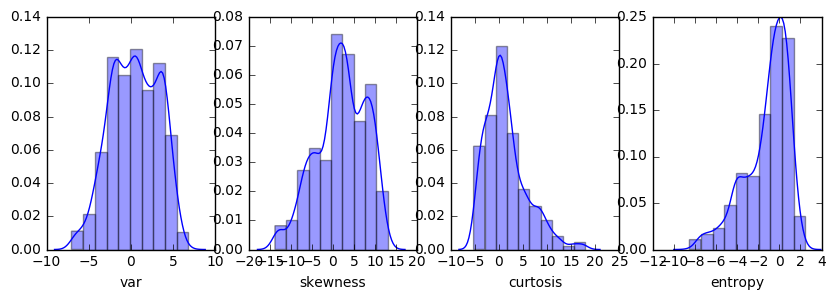

In [10]:
f, ax = plt.subplots(1, 4, figsize=(10,3))
vis1 = sns.distplot(df["var"],bins=10, ax= ax[0])
vis2 = sns.distplot(df["skewness"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["curtosis"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["entropy"],bins=10, ax=ax[3])
f.savefig('subplot.png')

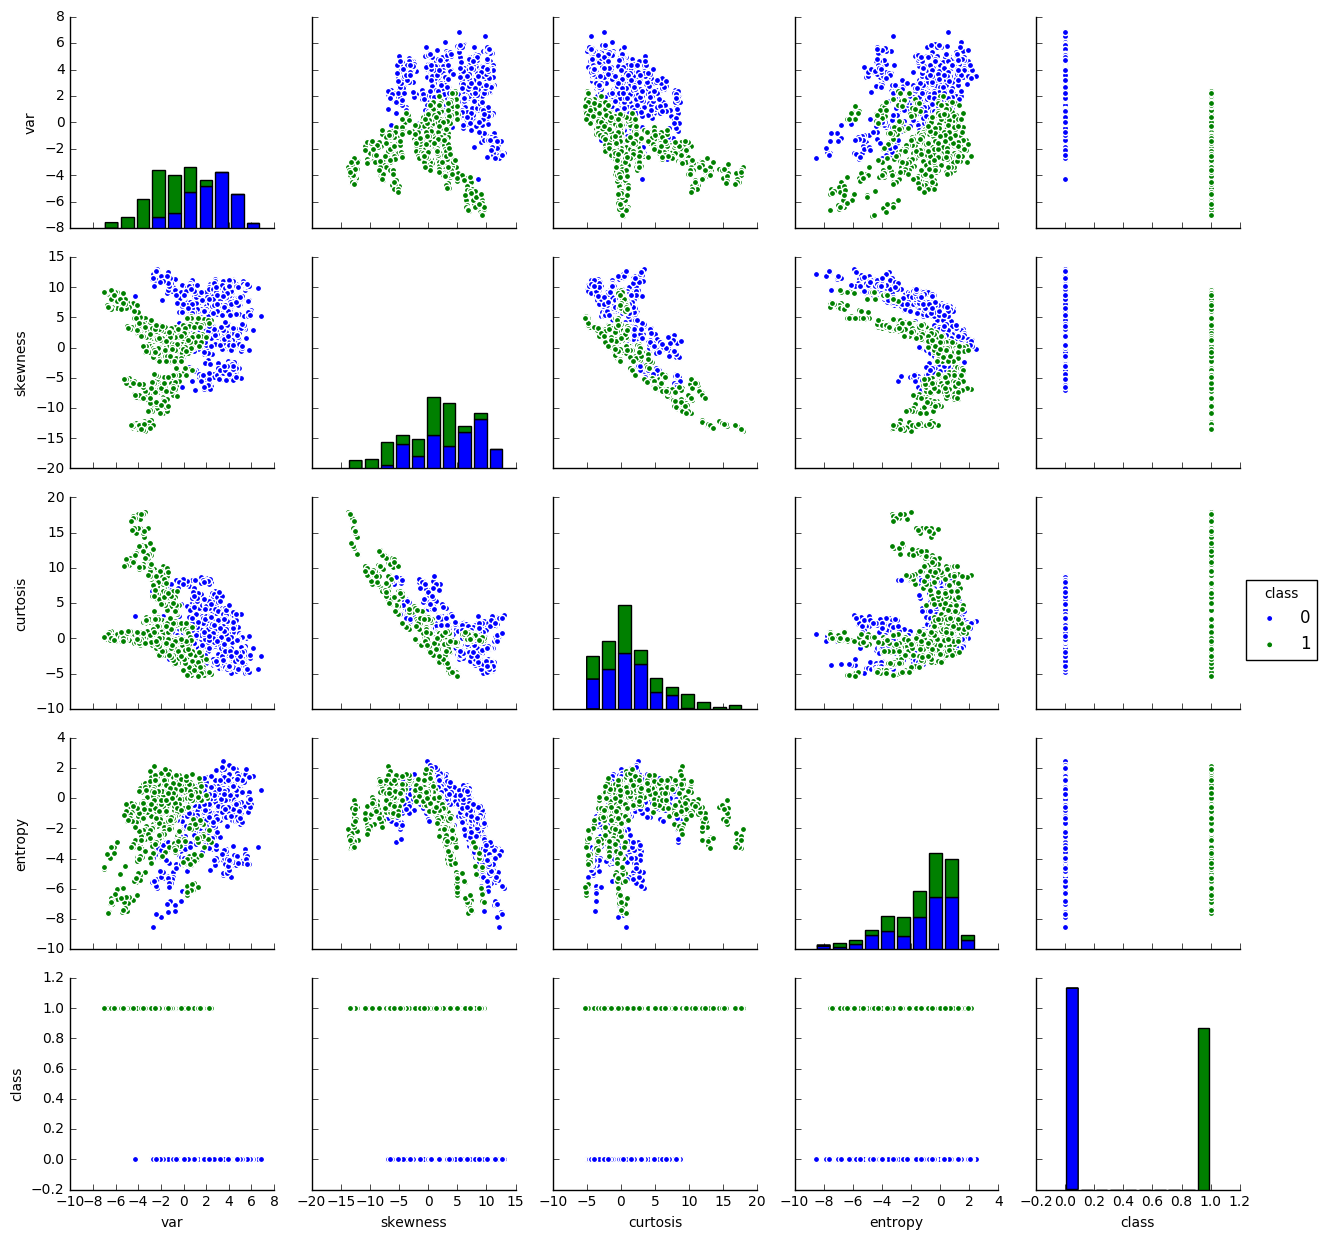

In [11]:
sns.pairplot(df, hue="class")

In [12]:
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)

# Obtain eigen vectors or eigen values

In [13]:
#type 1 - from covariance matrix

In [14]:
import numpy as np
mean_vec = np.mean(X_sd, axis=0)
cov_mat = ( ((X_sd - mean_vec).T).dot(X_sd - mean_vec) ) / (X_sd.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00072939  0.26421811 -0.38112776  0.2770186 ]
 [ 0.26421811  1.00072939 -0.78746918 -0.52670474]
 [-0.38112776 -0.78746918  1.00072939  0.31907345]
 [ 0.2770186  -0.52670474  0.31907345  1.00072939]]


In [15]:
print('NumPy covariance matrix: \n%s' %np.cov(X_sd.T))

NumPy covariance matrix: 
[[ 1.00072939  0.26421811 -0.38112776  0.2770186 ]
 [ 0.26421811  1.00072939 -0.78746918 -0.52670474]
 [-0.38112776 -0.78746918  1.00072939  0.31907345]
 [ 0.2770186  -0.52670474  0.31907345  1.00072939]]


In [16]:
#eigendecomposition on the covariance matrix
e_vals, e_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.24877213 -0.75459093  0.60346443  0.06734722]
 [-0.6393234   0.05034037 -0.11596089 -0.75847512]
 [ 0.6127065   0.1534594   0.5096688  -0.58419061]
 [ 0.39238854 -0.6360099  -0.6021806  -0.28089352]]

Eigenvalues 
[ 2.18149408  1.29409812  0.35163873  0.17568664]


In [17]:
#type 2 - from correlation matrix

In [18]:
cor_mat = np.corrcoef(X_sd.T)

e_vals, e_vecs = np.linalg.eig(cor_mat)

print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.24877213 -0.75459093  0.60346443  0.06734722]
 [-0.6393234   0.05034037 -0.11596089 -0.75847512]
 [ 0.6127065   0.1534594   0.5096688  -0.58419061]
 [ 0.39238854 -0.6360099  -0.6021806  -0.28089352]]

Eigenvalues 
[ 2.17990407  1.2931549   0.35138243  0.17555859]


In [19]:
#type 3 - Singular Vector Decomposition

In [20]:
u,s,v = np.linalg.svd(X_sd.T)
u

array([[-0.24877213,  0.75459093, -0.60346443, -0.06734722],
       [-0.6393234 , -0.05034037,  0.11596089,  0.75847512],
       [ 0.6127065 , -0.1534594 , -0.5096688 ,  0.58419061],
       [ 0.39238854,  0.6360099 ,  0.6021806 ,  0.28089352]])

In [22]:
# Make a list of (eigenvalue, eigenvector) tuples
e_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
e_pairs.sort()
e_pairs.reverse()

print('Eigenvalues in descending order:')
for i in e_pairs:
    print(i[0]) #print eigen values

Eigenvalues in descending order:
2.17990407371
1.29315489978
0.351382434012
0.175558592499


In [23]:
total = sum(e_vals)

In [25]:
var_exp = [(i / total)*100 for i in sorted(e_vals, reverse=True)]

In [26]:
var_exp

[54.497601842726262,
 32.328872494487527,
 8.7845608503083152,
 4.3889648124779068]

In [27]:
np.cumsum(var_exp)

array([  54.49760184,   86.82647434,   95.61103519,  100.        ])

In [29]:
matrix_w = np.hstack((e_pairs[0][1].reshape(4,1), 
                      e_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.24877213 -0.75459093]
 [-0.6393234   0.05034037]
 [ 0.6127065   0.1534594 ]
 [ 0.39238854 -0.6360099 ]]


In [30]:
#projection to new feature space

In [31]:
X_new = X_sd.dot(matrix_w)

In [32]:
X_new

array([[-1.47280494, -1.16391668],
       [-1.63944068, -1.09381204],
       [ 0.51391884, -1.32487953],
       ..., 
       [ 4.04932734,  2.03602288],
       [ 3.01961738,  1.39214023],
       [ 1.17058249,  0.09103094]])

In [33]:
df["PC1"] = X_new[:,0]
df["PC2"] = X_new[:,1]

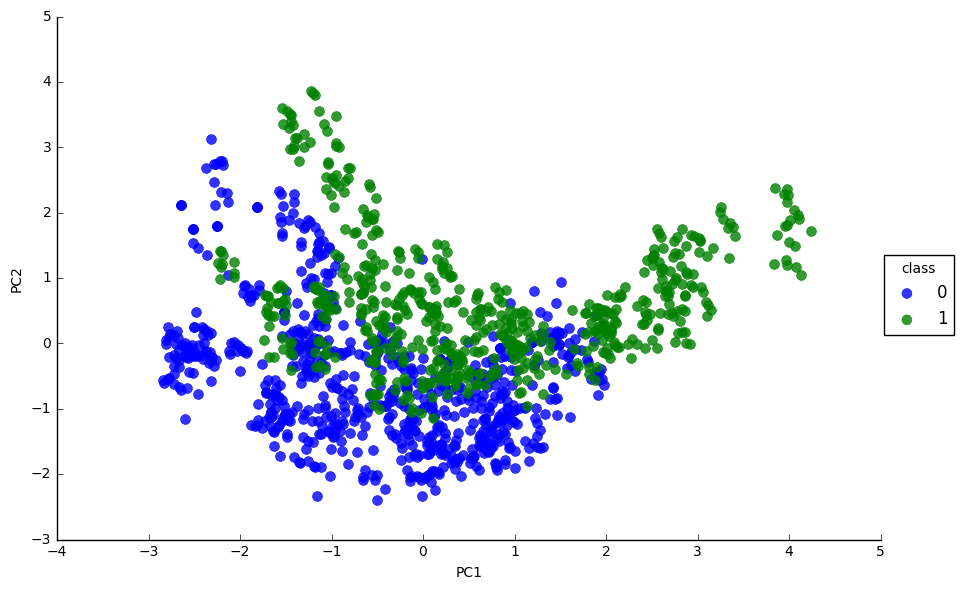

In [34]:
sns.lmplot(data = df[["PC1","PC2","class"]], x = "PC1", y = "PC2",fit_reg=False, hue = "class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )

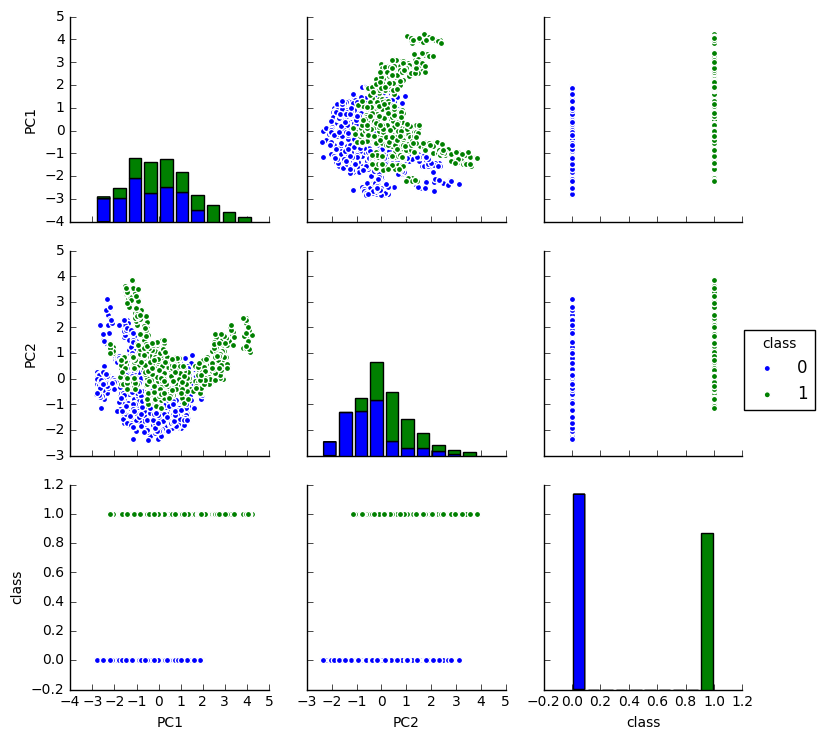

In [35]:
sns.pairplot(df[["PC1","PC2","class"]], hue="class")

In [43]:
#using scikit learn

In [55]:
from sklearn.decomposition import PCA 
model = PCA(n_components=2)
X_new = model.fit_transform(X_sd)

In [56]:
df["PC1"] = X_new[:,0]
df["PC2"] = X_new[:,1]

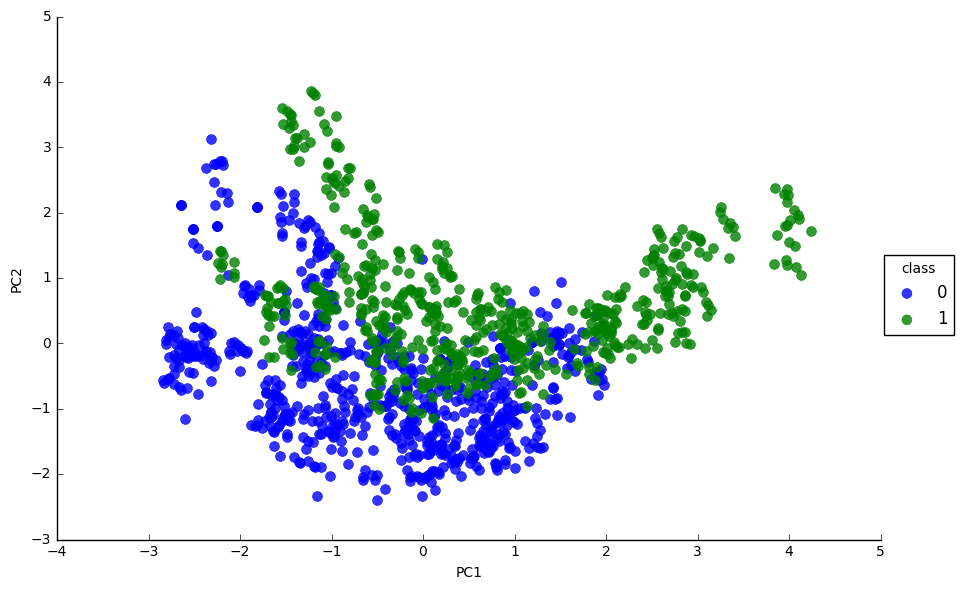

In [57]:
sns.lmplot(data = df[["PC1","PC2","class"]], x = "PC1", y = "PC2",fit_reg=False, hue = "class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )

In [54]:
print sklearn_pca.explained_variance_ratio_.cumsum()

SyntaxError: invalid syntax (<ipython-input-54-198906205160>, line 1)